#### Notes

**Feature Scaling**

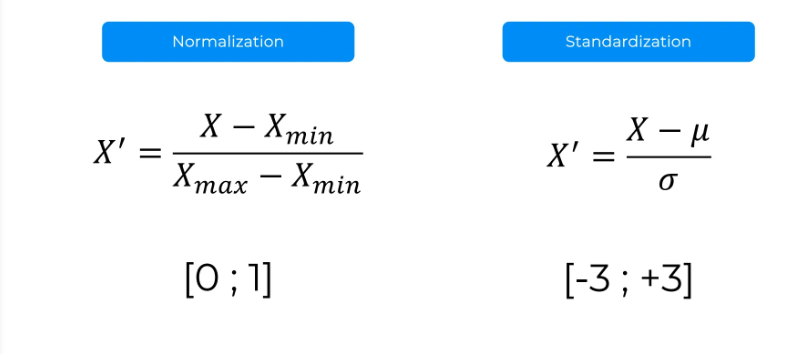

**Why fit only on the training set?**

Fitting on the test set would introduce information from the test set into the model training process, which violates the principle of keeping the test set as unseen data. This is a form of data leakage, which inflates model performance and makes it unreliable on truly unseen data.

Example:
Suppose the training set has a mean of 50 and the test set has a mean of 70. If you fit on the test set, the transformation will "know" something about future (unseen) data, which wouldn’t be available during actual model deployment.

#### Importing Dataset

In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('datasets/Data.csv')

In [2]:
X = dataset.iloc[:, :-1].values #Features
y = dataset.iloc[:, -1].values #Dependent Variable

In [5]:
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


#### Taking care of missing data

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean") #Replacing empty values by mean
X[:, 1:] = imputer.fit_transform(X[:, 1:])
print(X)


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


#### Encoding categorical data and dependent variable

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

#### Dataset splitting and Feature Scaling

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:, 3:] = scaler.fit_transform(X_train[:, 3:])
X_test[:, 3:] = scaler.transform(X_test[:, 3:]) # We fit the scaler to the train set and use the same scaler to transform the test set since fitting to the test set would lead to data leakage.


In [22]:
print(X_train)
print(X_test)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]
[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
